In [3]:
!pip install scikit-learn
!pip install tensorflow
!pip install shap

     ------------------------------------- 453.1/453.1 kB 13.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap

# Cargar el dataframe
df = pd.read_csv('FinalDatasett.csv')

# Definir características de entrada (X) y la variable objetivo (y)
X = df[['año', 'mes', 'dia', 'hora']]
y = df['consumo']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Entrenar modelo de regresión lineal
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_linear = linear_reg_model.predict(X_test)

# Calcular métricas
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)


In [6]:
# Entrenar modelo de árbol de decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular métricas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)


In [17]:
# Construir modelo RNN
rnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
rnn_model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Predecir en el conjunto de prueba
y_pred_rnn = rnn_model.predict(X_test)

# Calcular métricas
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


Epoch 1/50


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56075/56075 ━━━━━━━━━━━━━━━━━━━━ 41s 710us/step - loss: 5577.6528 - val_loss: 5425.5083
Epoch 2/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 38s 678us/step - loss: 5465.5229 - val_loss: 5426.2612
Epoch 3/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 45s 809us/step - loss: 5473.8325 - val_loss: 5415.3354
Epoch 4/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 41s 723us/step - loss: 5471.5581 - val_loss: 5423.7588
Epoch 5/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 41s 735us/step - loss: 5461.2734 - val_loss: 5414.7847
Epoch 6/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 47s 831us/step - loss: 5482.0322 - val_loss: 5415.9951
Epoch 7/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - loss: 5469.1680 - val_loss: 5417.0649
Epoch 8/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 49s 877us/step - loss: 5477.9619 - val_loss: 5423.2847
Epoch 9/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 54s 955us/step - loss: 5486.4536 - val_loss: 5415.5635
Epoch 10/50
56075/56075 ━━━━━━━━━━━━━━━━━━━━ 52s 934us/step - loss: 5484.7974 - val_loss: 5416.3545
Epoch 11/50
56075/5607

In [18]:
# Crear DataFrame con los resultados del entrenamiento
results_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'RNN'],
    'MAE': [mae_linear, mae_tree, mae_rnn],
    'MSE': [mse_linear, mse_tree, mse_rnn]
})

# Mostrar resultados
print("Resultados del entrenamiento:")
print(results_df)

Resultados del entrenamiento:
              Modelo        MAE          MSE
0   Regresión Lineal  55.862879  5428.716912
1  Árbol de Decisión  57.127830  5693.239360
2                RNN  55.931887  5422.087197


In [19]:
# Función para calcular métricas por subestación y modelo
def calculate_metrics_by_substation(df, model, model_name):
    metrics_by_substation = []
    for substation in df['sub_estacion'].unique():
        sub_df = df[df['sub_estacion'] == substation]
        X_sub = sub_df[['año', 'mes', 'dia', 'hora']]
        y_sub = sub_df['consumo']
        X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
        
        if model_name == 'RNN':
            history = model.fit(X_sub_train, y_sub_train, epochs=50, validation_data=(X_sub_test, y_sub_test), verbose=0)
            y_sub_pred = model.predict(X_sub_test)
        else:
            model.fit(X_sub_train, y_sub_train)
            y_sub_pred = model.predict(X_sub_test)
        
        mae_sub = mean_absolute_error(y_sub_test, y_sub_pred)
        mse_sub = mean_squared_error(y_sub_test, y_sub_pred)
        metrics_by_substation.append({'Subestación': substation, 'MAE': mae_sub, 'MSE': mse_sub})
    
    return pd.DataFrame(metrics_by_substation)

# Calcular métricas por subestación y modelo
metrics_linear_by_substation = calculate_metrics_by_substation(df, linear_reg_model, 'Regresión Lineal')
metrics_tree_by_substation = calculate_metrics_by_substation(df, tree_model, 'Árbol de Decisión')
metrics_rnn_by_substation = calculate_metrics_by_substation(df, rnn_model, 'RNN')

# Mostrar métricas por subestación
print("\nMétricas por subestación y modelo:")
print("Regresión Lineal:")
print(metrics_linear_by_substation)
print("\nÁrbol de Decisión:")
print(metrics_tree_by_substation)
print("\nRNN:")
print(metrics_rnn_by_substation)

1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
3236/3236 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step
2876/2876 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step

Métricas por subestación y modelo:
Regresión Lineal:
  Subestación        MAE           MSE
0     AJAHUEL  54.052643   3305.618819
1        BUIN  67.487480   9180.750295
2     LOSALME  24.170630    925.896290
3       CHENA  92.963627  14893.724664
4     ELSALTO  29.296146   1471.812059
5      CNAVIA  46.294804   3359.086331
6     FLORIDA  25.114971    991.566139

Árbol de Decisión:
  Subestación         MAE           MSE
0     AJAHUEL   70.478882   5973.190724
1        BUIN   92.347146  15146.840579
2     LOSALME   31.034734   1556.126639
3       CHENA  119.564391  24350.168620
4     ELSALTO   27.894703   1403.757111
5      CNAVIA   51.493703   4183.600008
6     FLORIDA   29.

In [20]:
from sklearn.metrics import r2_score

In [21]:
# Calcular R2 para cada modelo
r2_linear = r2_score(y_test, y_pred_linear)
r2_tree = r2_score(y_test, y_pred_tree)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Agregar R2 al DataFrame
results_df['R2'] = [r2_linear, r2_tree, r2_rnn]

# Mostrar resultados actualizados
print("Resultados del entrenamiento:")
print(results_df)

Resultados del entrenamiento:
              Modelo        MAE          MSE        R2
0   Regresión Lineal  55.862879  5428.716912  0.004075
1  Árbol de Decisión  57.127830  5693.239360 -0.044453
2                RNN  55.931887  5422.087197  0.005291


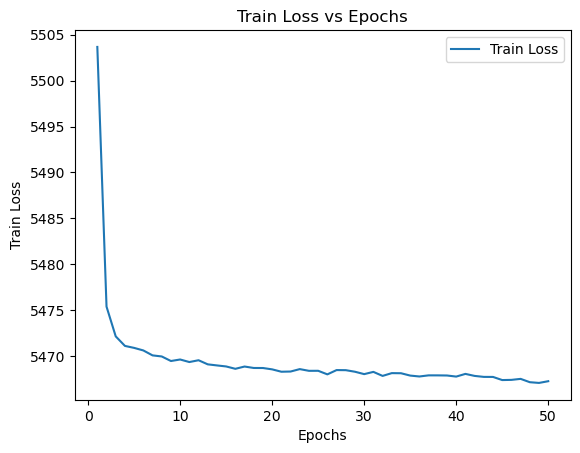

In [22]:
import matplotlib.pyplot as plt

# Obtener loss de entrenamiento por epoch de la historia del entrenamiento de la RNN
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

# Graficar train loss vs epochs
plt.plot(epochs, train_loss, label='Train Loss')
plt.title('Train Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()


In [23]:
def calculate_metrics_by_substation(df, model, model_name):
    metrics_by_substation = []
    for substation in df['sub_estacion'].unique():
        sub_df = df[df['sub_estacion'] == substation]
        X_sub = sub_df[['año', 'mes', 'dia', 'hora']]
        y_sub = sub_df['consumo']
        X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
        
        if model_name == 'RNN':
            # Construir modelo RNN
            rnn_model = Sequential([
                Dense(64, activation='relu', input_shape=(X_sub_train.shape[1],)),
                Dense(64, activation='relu'),
                Dense(1)
            ])

            # Compilar el modelo
            rnn_model.compile(optimizer='adam', loss='mse')

            # Entrenar el modelo con 50 epochs
            history = rnn_model.fit(X_sub_train, y_sub_train, epochs=50, validation_data=(X_sub_test, y_sub_test), verbose=0)
            y_sub_pred = rnn_model.predict(X_sub_test)
        else:
            model.fit(X_sub_train, y_sub_train)
            y_sub_pred = model.predict(X_sub_test)
        
        mae_sub = mean_absolute_error(y_sub_test, y_sub_pred)
        mse_sub = mean_squared_error(y_sub_test, y_sub_pred)
        r2_sub = r2_score(y_sub_test, y_sub_pred)
        metrics_by_substation.append({'sub_estacion': substation, 'modelo': model_name, 'MAE': mae_sub, 'MSE': mse_sub, 'R2': r2_sub})
    
    return pd.DataFrame(metrics_by_substation)

# Calcular métricas por subestación y modelo para cada modelo
metrics_linear_by_substation = calculate_metrics_by_substation(df, linear_reg_model, 'Regresión Lineal')
metrics_tree_by_substation = calculate_metrics_by_substation(df, tree_model, 'Árbol de Decisión')
metrics_rnn_by_substation = calculate_metrics_by_substation(df, rnn_model, 'RNN')

# Concatenar DataFrames de métricas por subestación y modelo
all_metrics_by_substation = pd.concat([metrics_linear_by_substation, metrics_tree_by_substation, metrics_rnn_by_substation], ignore_index=True)

# Mostrar DataFrame
print("Resultados del entrenamiento por subestación:")
print(all_metrics_by_substation)


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1798/1798 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1798/1798 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3236/3236 ━━━━━━━━━━━━━━━━━━━━ 2s 544us/step


C:\Users\diego\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2876/2876 ━━━━━━━━━━━━━━━━━━━━ 2s 517us/step
Resultados del entrenamiento por subestación:
   sub_estacion             modelo         MAE           MSE        R2
0       AJAHUEL   Regresión Lineal   54.052643   3305.618819  0.017179
1          BUIN   Regresión Lineal   67.487480   9180.750295 -0.000024
2       LOSALME   Regresión Lineal   24.170630    925.896290  0.056233
3         CHENA   Regresión Lineal   92.963627  14893.724664  0.001564
4       ELSALTO   Regresión Lineal   29.296146   1471.812059  0.153730
5        CNAVIA   Regresión Lineal   46.294804   3359.086331  0.009799
6       FLORIDA   Regresión Lineal   25.114971    991.566139  0.000068
7       AJAHUEL  Árbol de Decisión   70.478882   5973.190724 -0.775939
8          BUIN  Árbol de Decisión   92.347146  15146.840579 -0.649888
9       LOSALME  Árbol de Decisión   31.034734   1556.126639 -0.586162
10        CHENA  Árbol de Decisión  119.564391  24350.168620 -0.632371
11      ELSALTO  Árbol de Decisión   27.894703   1403.757

In [24]:
# Ordenar el DataFrame por sub_estacion y modelo
all_metrics_by_substation_sorted = all_metrics_by_substation.sort_values(by=['sub_estacion', 'modelo'])

# Mostrar DataFrame ordenado
print("Resultados del entrenamiento por subestación (ordenado):")
print(all_metrics_by_substation_sorted)

Resultados del entrenamiento por subestación (ordenado):
   sub_estacion             modelo         MAE           MSE        R2
14      AJAHUEL                RNN   53.966396   3299.037671  0.019136
0       AJAHUEL   Regresión Lineal   54.052643   3305.618819  0.017179
7       AJAHUEL  Árbol de Decisión   70.478882   5973.190724 -0.775939
15         BUIN                RNN   67.460627   9180.556135 -0.000003
1          BUIN   Regresión Lineal   67.487480   9180.750295 -0.000024
8          BUIN  Árbol de Decisión   92.347146  15146.840579 -0.649888
17        CHENA                RNN   93.360248  14878.101440  0.002611
3         CHENA   Regresión Lineal   92.963627  14893.724664  0.001564
10        CHENA  Árbol de Decisión  119.564391  24350.168620 -0.632371
19       CNAVIA                RNN   45.807064   3343.342098  0.014440
5        CNAVIA   Regresión Lineal   46.294804   3359.086331  0.009799
12       CNAVIA  Árbol de Decisión   51.493703   4183.600008 -0.233253
18      ELSALTO     

In [25]:
import numpy as np

# Calcular el coeficiente de correlación de Pearson (R)
pearson_corr = np.corrcoef(y_test, y_pred_linear)[0, 1]

# Calcular el coeficiente de determinación ajustado (R^2)
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_linear)) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print("Coeficiente de correlación de Pearson (R):", pearson_corr)
print("Coeficiente de determinación ajustado (R^2):", adjusted_r2)

Coeficiente de correlación de Pearson (R): 0.0638938122149843
Coeficiente de determinación ajustado (R^2): 0.004066221964548644


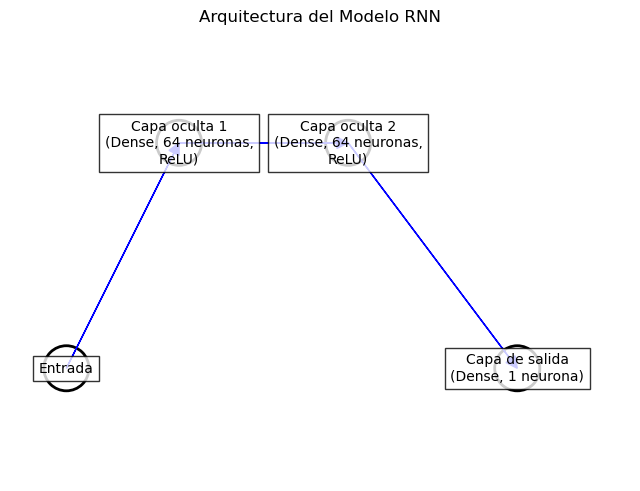

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Definir las coordenadas de los nodos
nodes = {
    'Entrada': (0, 3),
    'Capa oculta 1\n(Dense, 64 neuronas,\nReLU)': (1, 5),
    'Capa oculta 2\n(Dense, 64 neuronas,\nReLU)': (2.5, 5),
    'Capa de salida\n(Dense, 1 neurona)': (4, 3)
}

# Dibujar nodos
for node, coord in nodes.items():
    ax.text(coord[0], coord[1], node, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    ax.add_patch(Ellipse(coord, width=0.4, height=0.4, edgecolor='black', lw=2, facecolor='none'))

# Dibujar conexiones
for i in range(1, len(nodes)):
    ax.arrow(nodes[list(nodes.keys())[i-1]][0], nodes[list(nodes.keys())[i-1]][1], 
             nodes[list(nodes.keys())[i]][0]-nodes[list(nodes.keys())[i-1]][0], 
             nodes[list(nodes.keys())[i]][1]-nodes[list(nodes.keys())[i-1]][1], 
             head_width=0.1, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

# Configuraciones adicionales
ax.set_xlim(-0.5, 5)
ax.set_ylim(2, 6)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Arquitectura del Modelo RNN")
plt.show()


In [29]:
# Cargar el dataframe
df_test = pd.read_csv('test1.csv')

In [30]:
print(df_test.head())

      consumo  dia  mes   año  hora
0  -51.381349    1    2  2019     0
1 -171.906310    1    2  2019     0
2   94.762790    1    2  2019     0
3   47.114733    1    2  2019     0
4   59.313975    1    2  2019     0


In [31]:
# Seleccionar las columnas relevantes para las características de entrada
X_new = df_test[['dia', 'mes', 'año', 'hora']]

# Hacer predicciones usando el modelo RNN entrenado
y_pred = rnn_model.predict(X_new)

print("Predicción de consumo de energía para el conjunto de datos de prueba:")
print(y_pred)


70093/70093 ━━━━━━━━━━━━━━━━━━━━ 37s 526us/step
Predicción de consumo de energía para el conjunto de datos de prueba:
[[-41.24182]
 [-41.24182]
 [-41.24182]
 ...
 [119.14755]
 [119.14755]
 [119.14755]]


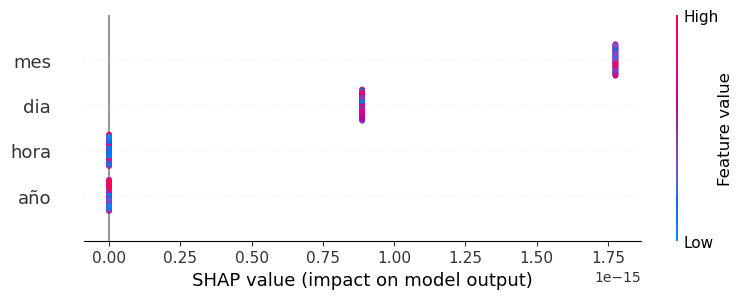

In [38]:
import shap
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['año', 'mes', 'dia', 'hora']], df['consumo'], test_size=0.2, random_state=42)

# Crear un explainer de SHAP con el modelo ya entrenado
explainer = shap.Explainer(rnn_model, X_train)

# Calcular los valores SHAP para una muestra aleatoria de los datos de prueba (por ejemplo, 100 instancias)
shap_values = explainer(X_test.sample(100))

# Resumen de los valores SHAP
shap.summary_plot(shap_values, X_test.sample(100))
